# ML Project  isii 21/22
Team N°10:
Taleb Mehdi,
Sennoun Merouane,
Zouai Serine Maria,
Aouanouk lmane,
Zemmouri Arslane

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regression Dataset  

Real estate valuation data set


Link: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set?fbclid=IwAR0yTDnyUu7Cae-1x9aGzdMSCfmttogCWEJ_i8DA48qaW8xgL3CDS_hOUis

In [2]:
#import the dataset: type file excel
df1 = pd.read_excel("Real estate valuation data set.xlsx")
# you need to download this file and upload it in anaconda

In [3]:
df1.head() #display the first five lines

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df1.tail() #display the last five lines


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


In [5]:
df1.shape  # 414 rows et 8 columns

(414, 8)

In [6]:
df1.rename(
    columns={
        "X1 transaction date": "Transaction_Date", 
        "X2 house age": "House_Age", 
        "X3 distance to the nearest MRT station": "Distance",
        "X4 number of convenience stores": "Num_Stores_NearBy",
        "X5 latitude": "Latitude",
        "X6 longitude": "Longitude",
        "Y house price of unit area": "Target",
    },
    inplace = True
)
#rename features

In [7]:
df1.head()

,No,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [8]:
df1.shape

(414, 8)

In [9]:
print(df1.info())

#In order to have more information about our dataset, both the name of the variables, the number of lines, the number of missing data, the type of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No                 414 non-null    int64  
 1   Transaction_Date   414 non-null    float64
 2   House_Age          414 non-null    float64
 3   Distance           414 non-null    float64
 4   Num_Stores_NearBy  414 non-null    int64  
 5   Latitude           414 non-null    float64
 6   Longitude          414 non-null    float64
 7   Target             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


In [10]:
df1.corr()  # The pairwise Correlation of  features in our dataset

,No,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
No,1.000000,-0.048634,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
Transaction_Date,-0.048634,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
House_Age,-0.032808,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
Distance,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
Num_Stores_NearBy,-0.012699,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
Latitude,-0.010110,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
Longitude,-0.011059,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Target,-0.028587,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


# Graphic Representation


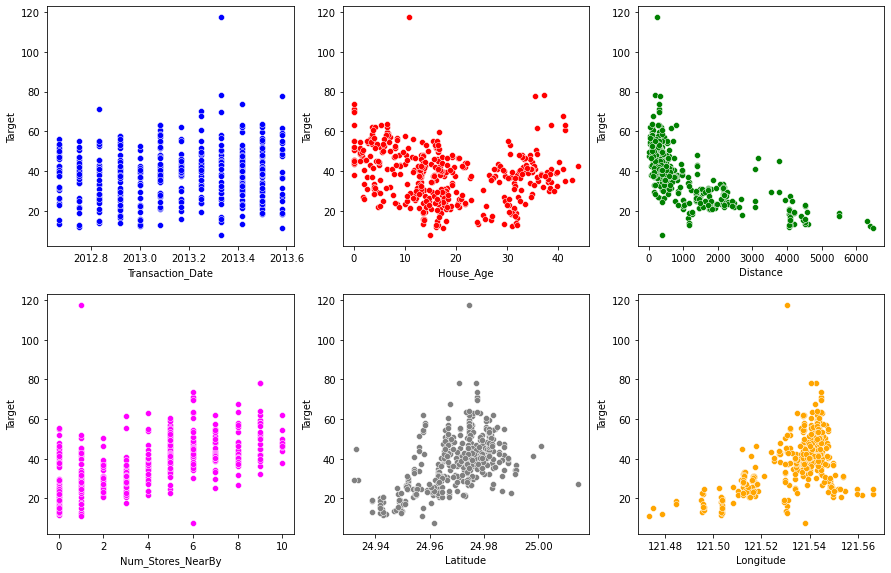

In [11]:
# Scatter subplot of each feature
fig = plt.figure(figsize=(15,15))

plt.subplot(331)
sns.scatterplot(data = df1, x = 'Transaction_Date', y = 'Target', color='blue')

plt.subplot(332)
sns.scatterplot(data = df1, x = 'House_Age', y = 'Target', color='red')

plt.subplot(333)
sns.scatterplot(data = df1, x = 'Distance', y = 'Target', color='green')

plt.subplot(334)
sns.scatterplot(data = df1, x = 'Num_Stores_NearBy', y = 'Target', color='magenta')

plt.subplot(335)
sns.scatterplot(data = df1,x = 'Latitude', y = 'Target', color='gray')

plt.subplot(336)
sns.scatterplot(data = df1, x = 'Longitude', y = 'Target', color='orange');



#  Preprocessing

## Dataset regression Real estate valuation

# 1- Missing values 

In the description of the regression dataset, it is mentioned that there is no missing values
and there is a command that allows us to determine whether or not there are missing values which is:

df1 .isna().sum()

In [12]:
df1.isna().sum()   # same result with this request : df1.isnull().sum()
# As you can notice all the values obtained are equal to zero therefore there are no missing values

No                   0
Transaction_Date     0
House_Age            0
Distance             0
Num_Stores_NearBy    0
Latitude             0
Longitude            0
Target               0
dtype: int64

In [13]:
df1.isnull().sum()
#how many missing values (sum of null values)

No                   0
Transaction_Date     0
House_Age            0
Distance             0
Num_Stores_NearBy    0
Latitude             0
Longitude            0
Target               0
dtype: int64

# 2- Remove an unnecessary attribute such as the "No" attribute

In [14]:
df1= df1.drop('No',axis=1)
df1


,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [15]:
df1.columns

Index(['Transaction_Date', 'House_Age', 'Distance', 'Num_Stores_NearBy',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

# 3- Encoding

In [16]:
df1.dtypes  # this command allows us to see the data type of our Dataframe and which is our case: numeric (float64 and int64), therefore, we have no categorical variable and which requires encoding

Transaction_Date     float64
House_Age            float64
Distance             float64
Num_Stores_NearBy      int64
Latitude             float64
Longitude            float64
Target               float64
dtype: object

# 4- Duplicate Values

In [17]:
print(df1.duplicated().values.sum())#this command allows us to know if we have duplicate values and as we can notice the value is 0  

0


# 5- Detecte outliers

In [18]:
df1.describe() #this command is used to display the  elementary statistics of the features
#count --> the count remains unchanged for each attribute and as we can still notice there are no missing values
#mean --> the mean 
#std --> the  standard deviation
# min--> the minimum value taken by each attribute and this can give us an overview of the outliers for example house_Age its min value is 0.000000 and does not contain a negative value which could be interpreted as an outlier
# max--> the maximum value taken by each attribute
# 25% , 50% , 75% represent the quartiles, and 50% is the median

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [19]:
# in order to detect outliers method, we use z score method:

def detect_outliers(data):
    outilers=[]
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outilers.append(i)
    
    return outilers


In [20]:

outlierstransaction=detect_outliers(df1['Transaction_Date'])  # no outliers 
outliersHouseAge=detect_outliers(df1['House_Age'])  # no outliers 
outliersDistance=detect_outliers(df1['Distance'])
outliersNum_Store=detect_outliers(df1['Num_Stores_NearBy'])  # no outliers 
outliersLatitude=detect_outliers(df1['Latitude']) 
outliersLogtitude=detect_outliers(df1['Longitude'])
print (outlierstransaction)
print (outliersHouseAge)
print (outliersDistance)
print (outliersNum_Store)
print (outliersLatitude)
print (outliersLogtitude)

[]
[]
[5512.038, 6396.283, 6306.153, 5512.038, 6488.021]
[]
[25.01459]
[121.48458, 121.47883, 121.47516, 121.48458, 121.47353]


In [21]:
outliers1=detect_outliers(df1['Distance'])
outliers2=detect_outliers(df1['Latitude']) 
outliers3=detect_outliers(df1['Longitude'])
print (outliers1)
print (outliers2)
print (outliers3)

[5512.038, 6396.283, 6306.153, 5512.038, 6488.021]
[25.01459]
[121.48458, 121.47883, 121.47516, 121.48458, 121.47353]


In [22]:
df_outliers = df1[df1['Distance'] == 5512.038].append(df1[df1['Distance'] == 6396.283]).append(df1[df1['Distance'] == 6306.153]).append(df1[df1['Distance'] == 5512.038]).append(df1[df1['Distance'] == 6488.021]).append(df1[df1['Latitude'] == 25.01459]).append(df1[df1['Longitude'] == 121.48458]).append(df1[df1['Longitude'] == 121.47883]).append(df1[df1['Longitude'] == 121.47516]).append(df1[df1['Longitude'] == 121.48458]).append(df1[df1['Longitude'] == 121.47353])
df_outliers = df_outliers.drop_duplicates()
df_outliers = df_outliers.sort_index()
df_outliers

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
8,2013.500000,31.7,5512.038,1,24.95095,121.48458,18.8
35,2013.500000,13.9,4079.418,0,25.01459,121.51816,27.3
116,2013.000000,30.9,6396.283,1,24.94375,121.47883,12.2
249,2012.833333,18.0,6306.153,1,24.95743,121.47516,15.0
255,2013.416667,31.5,5512.038,1,24.95095,121.48458,17.4
347,2013.583333,17.4,6488.021,1,24.95719,121.47353,11.2


In [23]:
#Deletion of the outliers from the dataframe
df1 = df1.drop(labels=[8,35,116,249,255,347], axis=0)
df1.index = np.arange(0, len(df1))
df1

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
403,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
404,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
405,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
406,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


# 6- Feature scaling (Normalisation)  

In [24]:
from sklearn.preprocessing import MinMaxScaler #To make our values between 0 and 1
s= MinMaxScaler()
df2 =s.fit_transform(df1)

#apply the following formula X’=(X-X_min)/(X_max  – X_min)

In [25]:
import pandas as pd
import numpy as np
df2=pd.DataFrame(df2)
df2.columns= df1.columns # rename the features of df2 and give them the name of features of df1
df2

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
0,0.272727,0.730594,0.013420,1.0,0.736972,0.634410,0.275705
1,0.272727,0.445205,0.061805,0.9,0.698755,0.624157,0.314832
2,1.000000,0.303653,0.117538,0.5,0.801824,0.685955,0.361237
3,0.909091,0.303653,0.117538,0.5,0.801824,0.685955,0.429481
4,0.181818,0.114155,0.080130,0.5,0.684713,0.665449,0.323021
...,...,...,...,...,...,...,...
403,0.363636,0.312785,0.885707,0.0,0.137232,0.122753,0.070974
404,0.000000,0.127854,0.014637,0.9,0.611754,0.674579,0.385805
405,0.636364,0.429224,0.080218,0.7,0.682687,0.629073,0.300273
406,0.363636,0.184932,0.017770,0.5,0.501882,0.640449,0.408553


# Linear Regression Gradient Descent 

In [26]:
#import librairies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
Data1= pd.DataFrame(df2)

#print(Data1)

X0= np.ones((408,1)) # prepare the column X0 which contains only 1 in order to  add it to use it after 
#print(X0)

X11= np.append(X0, Data1 , axis=1)
#print(X11)

data2=pd.DataFrame(X11, columns=['X0','Transaction_Date','House_Age','Distance','Num_Stores_NearBy','Latitude','Longitude','Target'])
#print(data2)

In [28]:
Y = data2['Target'] 
print(Y)

0      0.275705
1      0.314832
2      0.361237
3      0.429481
4      0.323021
         ...   
403    0.070974
404    0.385805
405    0.300273
406    0.408553
407    0.512284
Name: Target, Length: 408, dtype: float64


In [29]:
#Spliting our Data2 into train data and test data and validation data 
#60% of the data will be used for training the model while 20% will be used for testing the model and 20% for the validation of our model .


data_train =data2.sample(frac=0.6, random_state = 1)
data_test = data2.drop(data_train.index)
data_train.reset_index(drop=True,inplace=True)
data_test.reset_index(drop=True,inplace=True)
data_test1 = data_test.sample(frac=0.5, random_state = 1)
data_valid = data_test.drop(data_test1.index)
data_test1.reset_index(drop=True,inplace=True)
data_valid.reset_index(drop=True,inplace=True)

In [30]:
print(data_train.shape)
print(data_test1.shape)
print(data_valid.shape)

#here we will notice that our data test and data valid are not equal because our data contain 408 rows and 8 attributes 
#So when we split the data we will have :
# 60% data training : 245 rows and 8 attributes
#20% data testing : 82 rows and 8 attributes 
#And the rest 20% data validation : 81 rows and 8 attributes

(245, 8)
(82, 8)
(81, 8)


In [31]:
X_train = data_train.drop(['Target'],axis=1)#removing 'Target' from X_train
Y_train = data_train[['Target']]
#print(X_train)
#print(Y_train)

In [32]:
X_test1 = data_test1.drop(['Target'],axis=1)#removing 'Target' from X_test1
Y_test1 = data_test1[['Target']]
#print(X_test1_X)
#print(Y_test1_Y)

In [33]:
X_valid = data_valid.drop(['Target'],axis=1)#removing 'Target' from X_valid
Y_valid = data_valid[['Target']]
#print(X_valid)
#print(Y_valid)

We would like to predict Y to X train so we follow this steps :

In [34]:
import sklearn
from sklearn import linear_model
reg = LinearRegression()
reg.fit(X_train[['X0','Transaction_Date','House_Age','Distance','Num_Stores_NearBy','Latitude','Longitude']], Y_train)
y_predicted = reg.predict(X_test1[['X0','Transaction_Date','House_Age','Distance','Num_Stores_NearBy','Latitude','Longitude']])
print("Mean squared error: %.2f" % mean_squared_error(Y_test1, y_predicted))#calculate MSE 
print('R²: %.2f' % r2_score(Y_test1, y_predicted))#calculate R²

Mean squared error: 0.01
R²: 0.42


In [35]:

ML =linear_model.LinearRegression()
ML.fit(X_train, Y_train)
y_pred= ML.predict(X_test1)
#print(y_pred)
print(y_pred.shape)

(82, 1)


In [36]:
print('R²: %.2f' %r2_score(Y_test1,y_pred))
print("Mean squared error: %.2f" % mean_squared_error(Y_test1, y_pred))

R²: 0.42
Mean squared error: 0.01


Text(0.5, 1.0, 'Predicted target - Test target\n (MSE = 0.01)')

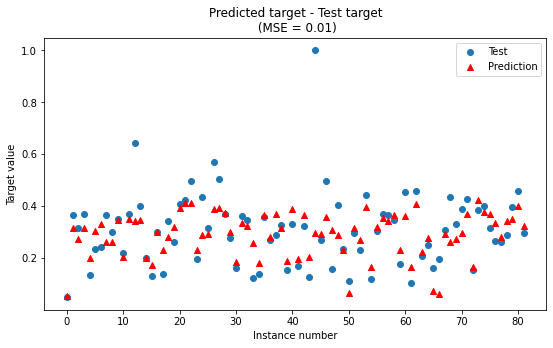

In [37]:
#Plotting the predicted Y and Y test 
plt.figure(figsize=(9, 5))
plt.scatter(range(0, 82), Y_test1)
plt.scatter(range(0, 82), y_predicted, marker = "^", color = "red")
plt.legend(["Test", "Prediction"])
plt.xlabel("Instance number")
plt.ylabel("Target value")
plt.title("Predicted target - Test target\n (MSE = 0.01)")

In [38]:
print(Y_test1.shape)
print(y_pred.shape)

y_testtt=Y_test1.iloc[:,-1]
#print(y_testtt)
y_prediction =pd.DataFrame(y_pred)
y_predd=y_prediction.iloc[:,-1]
#print(y_predd)

(82, 1)
(82, 1)


Next, we will notice that there are small difference between Y predicted and our Y test 

In [39]:
#here to show the difference between our Y test and Y predicted
pred_y_df=pd.DataFrame({'Actual Value':y_testtt,'Predicted Value':y_predd, 'Difference':(y_testtt-y_predd)})
pred_y_df[0:10]

,Actual Value,Predicted Value,Difference
0,0.049136,0.053258,-0.004123
1,0.367607,0.317493,0.050114
2,0.315742,0.274478,0.041264
3,0.369427,0.317266,0.052160
4,0.133758,0.199696,-0.065938
5,0.236579,0.304831,-0.068252
6,0.243858,0.330781,-0.086923
7,0.367607,0.264347,0.103260
8,0.300273,0.260663,0.039610
9,0.351228,0.347808,0.003420


Next we will start our gradient descent and to not confuse our code we will split once again our dataset to be confortable to not mix all the code 

In [40]:
df2

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude,Target
0,0.272727,0.730594,0.013420,1.0,0.736972,0.634410,0.275705
1,0.272727,0.445205,0.061805,0.9,0.698755,0.624157,0.314832
2,1.000000,0.303653,0.117538,0.5,0.801824,0.685955,0.361237
3,0.909091,0.303653,0.117538,0.5,0.801824,0.685955,0.429481
4,0.181818,0.114155,0.080130,0.5,0.684713,0.665449,0.323021
...,...,...,...,...,...,...,...
403,0.363636,0.312785,0.885707,0.0,0.137232,0.122753,0.070974
404,0.000000,0.127854,0.014637,0.9,0.611754,0.674579,0.385805
405,0.636364,0.429224,0.080218,0.7,0.682687,0.629073,0.300273
406,0.363636,0.184932,0.017770,0.5,0.501882,0.640449,0.408553


In [41]:
#Spliting our Data2 into train data and test data and validation data 
#60% of the data will be used for training the model while 20% will be used for testing the model and 20% for the validation of our model .

data_train_GD = df2.sample(frac=0.6, random_state = 1)
data_test_GD = df2.drop(data_train_GD.index)
data_train_GD.reset_index(drop=True,inplace=True)
data_test_GD.reset_index(drop=True,inplace=True)
data_test1_GD = data_test_GD.sample(frac=0.5, random_state = 1)
data_valid_GD = data_test_GD.drop(data_test1_GD.index)
data_test1_GD.reset_index(drop=True,inplace=True)
data_valid_GD.reset_index(drop=True,inplace=True)

In [42]:
#here we will notice that our data test and data valid are not equal because our data contain 408 rows and 8 attributes 
#So when we split the data we will have :
# 60% data training : 245 rows and 8 attributes
#20% data testing : 82 rows and 8 attributes 
#And the rest 20% data validation : 81 rows and 8 attributes
print(data_train_GD.shape)
print(data_test1_GD.shape)
print(data_valid_GD.shape)

(245, 7)
(82, 7)
(81, 7)


In [43]:
X_train_GD = data_train_GD.drop(['Target'],axis=1).values #removing 'Target' from X_train_GD
Y_train_GD = data_train_GD['Target']
X_test1_GD = data_test1_GD.drop(['Target'],axis=1).values#removing 'Target' from X_test1_GD
Y_test1_GD = data_test1_GD['Target']
X_valid_GD = data_valid_GD.drop(['Target'],axis=1).values#removing 'Target' from X_valid_GD
Y_valid_GD = data_valid_GD['Target']

In [44]:
def LinearRegression_with_gradient_descent(X_train_GD, Y_train_GD, alpha, iteration):
    m = X_train_GD.shape[0]  # number of samples
    ones =np.ones((m,1))  
    XX = np.concatenate((ones, X_train_GD), axis=1)   # Add the column X0 which contain only  1 
    n = XX.shape[1]   # 
    Theta = np.zeros(n)   # n= 7  parameter initialization with adding X0
    h = np.dot(XX, Theta)   # Compute hypothesis
    
    
    # Gradient descent algorithm
    cost = np.ones(iteration)
    for i in range (0, iteration):
        Theta[0] = Theta[0] - (alpha / X_train_GD.shape[0]) * sum(h-Y_train_GD)
        for j in range(1, n):
            Theta[j]= Theta[j] - (alpha/ X_train_GD.shape[0]) * sum((h-Y_train_GD) * XX[:, j])
            h  = np.dot(XX, Theta)
            cost[i] = 1/(2*m) * sum(np.square(h-Y_train_GD))  # Compute the Cost
    return cost, Theta

In [45]:
# Calculating theta and cost
cost, theta = LinearRegression_with_gradient_descent(X_train_GD, Y_train_GD,0.01, 2000)
print(theta)
#print(cost)

[ 0.11924044  0.03531489 -0.06023787 -0.08162759  0.12049321  0.12277323
  0.12028652]


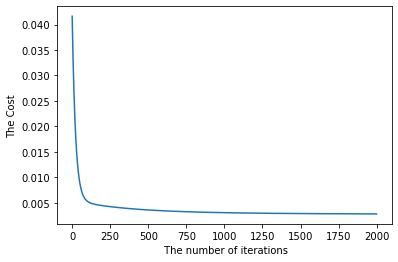

Lowest cost =0.0028062081495284674
 Cost after 2000 iterations = 0.0028062081495284674


In [46]:
#Plotting the cost 
plt.plot(cost)
plt.xlabel(" The number of iterations")
plt.ylabel( "The Cost")
plt.show()
print("Lowest cost =" + str(np.min(cost)))
print(" Cost after 2000 iterations = " + str(cost[-1]))

In [47]:
#here alpha is not good because the gradient descent don't converge 

cost1, theta1 = LinearRegression_with_gradient_descent(X_train_GD, Y_train_GD,0.0001, 2000)
print(theta1)
#print(cost1)

[0.04339223 0.02319745 0.01661524 0.00608427 0.02061611 0.02510327
 0.0256266 ]


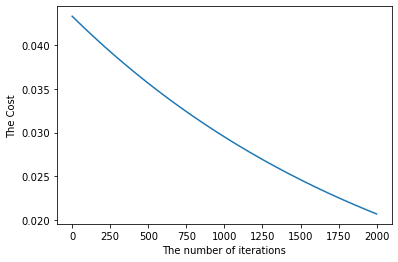

Lowest cost =0.0028062081495284674
 Cost after 2000 iterations = 0.0028062081495284674


In [48]:
plt.plot(cost1)
plt.xlabel("The number of iterations")
plt.ylabel( "The Cost")
plt.show()
print("Lowest cost =" + str(np.min(cost)))
print(" Cost after 2000 iterations = " + str(cost[-1]))

In [49]:
#after a lot of iteration we found the best alpha which converge out gradient descent
#exemples :
#alpha =0.0001   cost=0.0028062081495284674
#alpha=0.00001     cost =0.0028062081495284674

In [50]:
#so the best theta with a lowest cost are :
print(theta)#which correspond to theta0 , theta1, theta2, theta3, theta4, theta5, theta6
#print(cost)

[ 0.11924044  0.03531489 -0.06023787 -0.08162759  0.12049321  0.12277323
  0.12028652]


# Normal equation (NE)


Remark: in this methode (Normal equation) we don't need to apply the feature scaling 


In [51]:
import pandas as pd
import numpy as np

dataenlevertarget= df1.drop('Target',axis=1)  # we remove the Target column to prepare the matrix X

dataenlevertarget= pd.DataFrame(dataenlevertarget)

display(dataenlevertarget)

arrayprepareX= dataenlevertarget.to_numpy()   # convert dataframe dataenlevertarget to array to array for doing operations later

X0= np.ones((408,1)) # prepare the column X0 which contains only 1 in order to  add it to  arrayprepare X and have X
X0

,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
403,2013.000000,13.7,4082.01500,0,24.94155,121.50381
404,2012.666667,5.6,90.45606,9,24.97433,121.54310
405,2013.250000,18.8,390.96960,7,24.97923,121.53986
406,2013.000000,8.1,104.81010,5,24.96674,121.54067


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [52]:
dataenlevertarget.shape

(408, 6)

In [53]:
import pandas as pd
import numpy as np

X= np.append(X0, arrayprepareX , axis=1) #prepare the matrix X
X

array([[1.00000000e+00, 2.01291667e+03, 3.20000000e+01, ...,
        1.00000000e+01, 2.49829800e+01, 1.21540240e+02],
       [1.00000000e+00, 2.01291667e+03, 1.95000000e+01, ...,
        9.00000000e+00, 2.49803400e+01, 1.21539510e+02],
       [1.00000000e+00, 2.01358333e+03, 1.33000000e+01, ...,
        5.00000000e+00, 2.49874600e+01, 1.21543910e+02],
       ...,
       [1.00000000e+00, 2.01325000e+03, 1.88000000e+01, ...,
        7.00000000e+00, 2.49792300e+01, 1.21539860e+02],
       [1.00000000e+00, 2.01300000e+03, 8.10000000e+00, ...,
        5.00000000e+00, 2.49667400e+01, 1.21540670e+02],
       [1.00000000e+00, 2.01350000e+03, 6.50000000e+00, ...,
        9.00000000e+00, 2.49743300e+01, 1.21543100e+02]])

In [54]:
import pandas as pd
import numpy as np

Y = df1['Target']   # Prepare the vector Y of size m=414 and 1 column
Y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
403    15.4
404    50.0
405    40.6
406    52.5
407    63.9
Name: Target, Length: 408, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.44, random_state = 0)

# test_size=0.2 ---> cost= 0.5049142035473477 (20% test et 80% train)
# test_size=0.3 ---> cost= 0.11857450463201558 (30% test et 70% train)
# test_size=0.4 ---> cost= 0.004369710852731163 (40% test et 60% train)
# test_size=0.41 ---> cost= 0.036047538060923735 (41% test et 59% train)
# test_size=0.42 ---> cost=0.26449237849682583 (42% test et 58% train)
# test_size=0.43 ---> cost= 0.19137303818568502 (43% test et 57% train)
# test_size=0.44 ---> cost= 0.00029727114900567796 (44% test et 56% train)
# test_size=0.45 ---> cost= 0.03723089533404737 (45% test et 55% train)
# test_size=0.46 ---> cost= 0.008247035253782425 (46% test et 54% train)
# test_size=0.48 ---> cost= 0.07642948746289821 (48% test et 52% train)
# test_size=0.49 ---> cost= 0.06064303533562981(49% test et 51% train)
# test_size=0.5 ---> cost= 0.014106221820501754 (50% test et 50% train)

#consequently, we takes test_size=0.44 where we found cost= 0.00029727114900567796

print("X_train shape: {}".format(X_train.shape)) 
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape)) 
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (228, 7)
Y_train shape: (228,)
X_test shape: (180, 7)
Y_test shape: (180,)


In [56]:
Xtrps= X_train.T # the transpose of X
Xtrps

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.01341667e+03, 2.01308333e+03, 2.01275000e+03, ...,
        2.01316667e+03, 2.01266667e+03, 2.01308333e+03],
       [1.36000000e+01, 8.10000000e+00, 1.56000000e+01, ...,
        1.33000000e+01, 2.94000000e+01, 3.02000000e+01],
       ...,
       [5.00000000e+00, 5.00000000e+00, 2.00000000e+00, ...,
        5.00000000e+00, 1.00000000e+00, 3.00000000e+00],
       [2.49651500e+01, 2.49667400e+01, 2.49779500e+01, ...,
        2.49651500e+01, 2.49492500e+01, 2.49700500e+01],
       [1.21537370e+02, 1.21540670e+02, 1.21534510e+02, ...,
        1.21537370e+02, 1.21495420e+02, 1.21537580e+02]])

In [57]:
xtrps_dot_X= Xtrps.dot(X_train)      #  X_train.T X_train
xtrps_dot_X

array([[2.28000000e+02, 4.58992500e+05, 4.13500000e+03, 2.30227954e+05,
        9.48000000e+02, 5.69284770e+03, 2.77098515e+04],
       [4.58992500e+05, 9.24009294e+08, 8.32429126e+06, 4.63483292e+08,
        1.90844525e+06, 1.14604140e+07, 5.57833947e+07],
       [4.13500000e+03, 8.32429126e+06, 1.05469200e+05, 4.08391483e+06,
        1.78113000e+04, 1.03248740e+05, 5.02544499e+05],
       [2.30227954e+05, 4.63483292e+08, 4.08391483e+06, 5.14222362e+08,
        4.94195633e+05, 5.74655492e+06, 2.79779723e+07],
       [9.48000000e+02, 1.90844525e+06, 1.78113000e+04, 4.94195633e+05,
        5.90200000e+03, 2.36742549e+04, 1.15218643e+05],
       [5.69284770e+03, 1.14604140e+07, 1.03248740e+05, 5.74655492e+06,
        2.36742549e+04, 1.42142643e+05, 6.91877051e+05],
       [2.77098515e+04, 5.57833947e+07, 5.02544499e+05, 2.79779723e+07,
        1.15218643e+05, 6.91877051e+05, 3.36770122e+06]])

In [58]:
#Regularization 
#n= len(xtrps_dot_X)
#L=np.eye(n)
#L[0,0]=0

#lamda=180

#initialement without lamda*l(regularization)  cost= 0.00029727114900567796
#lamda=0.1 cost=0.002253520093617522
#lamda=40 cost=0.0007960680626412516
#lamda=400 cost=0.0007295950321839119
#lamda=60 cost= 0.0006652943386509637
#lamda=80 cost= 0.0006119894147395088
#lamda=100 cost=0.000588272164768957
#lamda=180 cost=0.0005845910760909942
#lamda=200 cost=0.0005925002416069014
#lamda=240 cost=0.0006130633667109279
#lamda=280 cost=0.0006381004825140739
#lamda=1000 cost= 0.001307749347605921

# so the best is Lambda=180 
#lamdadotL= lamda* L
#lamdadotL
#the regularization (adding λ*L ) is generally used when X.T X  IS NOT invertible but in our case  (X.T X) is invertible, so no need
#Also the number of features is < compared to the number of instances

In [59]:
#temp_1=np.linalg.inv(xtrps_dot_X+ lamdadotL)  # inverse( X_train.T X_train + λ*L) 
temp_1=np.linalg.inv(xtrps_dot_X)  # inverse( X_train.T X_train )
temp_1

array([[ 1.07039721e+06, -1.08448422e+02, -1.00990248e-02,
        -7.31701531e-02,  5.61514906e-01, -2.09981620e+03,
        -6.57900532e+03],
       [-1.08448421e+02,  5.78013853e-02, -2.83191498e-05,
        -2.97281832e-06, -5.40724476e-04, -6.24181295e-02,
        -5.22381457e-02],
       [-1.00990232e-02, -2.83191500e-05,  3.34326726e-05,
        -1.84463442e-08, -9.61674007e-06, -3.93305230e-03,
         1.35569986e-03],
       [-7.31701535e-02, -2.97281821e-06, -1.84463441e-08,
         1.37240749e-08,  1.32198358e-06,  3.72143872e-04,
         5.74683746e-04],
       [ 5.61514913e-01, -5.40724477e-04, -9.61674007e-06,
         1.32198358e-06,  8.68062628e-04, -3.12882443e-02,
         1.07252388e-02],
       [-2.09981624e+03, -6.24181239e-02, -3.93305230e-03,
         3.72143874e-04, -3.12882443e-02,  5.14087372e+01,
         7.74835217e+00],
       [-6.57900533e+03, -5.22381375e-02,  1.35569987e-03,
         5.74683744e-04,  1.07252388e-02,  7.74835200e+00,
         5.3400930

In [60]:
temp_2= Xtrps.dot(Y_train)  # X_train.T Y_train
temp_2

array([8.65420000e+03, 1.74220131e+07, 1.51380210e+05, 6.41924346e+06,
       4.10389000e+04, 2.16104383e+05, 1.05180326e+06])

In [61]:
Teta = temp_1.dot(temp_2)  # INV(X_train.T X_train)* (X-train.T Y_train) = temp_1* temp_2
Teta

array([-5.24701030e+03,  3.52090313e+00, -2.47900276e-01, -5.90263191e-03,
        9.22473827e-01,  2.25931190e+02, -6.11976546e+01])

In [62]:
teta0= Teta[0]
teta1= Teta[1]
teta2= Teta[2]
teta3= Teta[3]
teta4= Teta[4]
teta5= Teta[5]
teta6= Teta[6]

print(teta0)
print(teta1)
print(teta2)
print(teta3)
print(teta4)
print(teta5)
print(teta6)

-5247.010301589966
3.5209031274716835
-0.24790027635776823
-0.005902631913727419
0.9224738268985675
225.93118986394256
-61.197654627263546


In [63]:
def pred_value(teta0,teta1,teta2,teta3,teta4,teta5,teta6,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude):
    prediction_value= teta0+ teta1*Transaction_Date+ teta2*House_Age+ teta3*Distance+ teta4*Num_Stores_NearBy+ teta5*Latitude+ teta6*Longitude
    return prediction_value 

In [64]:

Transaction_Date=2013.000000
House_Age= 8.1
Distance= 104.81010
Num_Stores_NearBy= 5
Latitude= 24.96674
Longitude= 121.54067

print (pred_value(teta0,teta1,teta2,teta3,teta4,teta5,teta6,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude))
#406	2013.000000	8.1	104.81010	5	24.96674	121.54067	52.5


45.314744862865155


In [65]:
Transaction_Date=2013.500000
House_Age= 6.5
Distance= 90.45606
Num_Stores_NearBy= 9
Latitude= 24.97433
Longitude= 121.54310

print (pred_value(teta0,teta1,teta2,teta3,teta4,teta5,teta6,Transaction_Date,House_Age,Distance,Num_Stores_NearBy,Latitude,Longitude))

#407	2013.500000	6.5	90.45606	9	24.97433	121.54310	63.9

52.812566221285124


In [66]:
def calculate_hypothesis(X,teta,i): 
    hypthessis=teta[0]*X[i,0]+teta[1]*X[i,1]+teta[2]*X[i,2]+teta[3]*X[i,3]+teta[4]*X[i,4]+teta[5]*X[i,5]+teta[6]*X[i,6]
    return hypthessis

In [67]:
hypotessis_vec= np.array([])
lenght= np.size(X_test,0)
for i in np.arange(lenght):
    hypothessis= calculate_hypothesis(X_test,Teta,i)
    hypotessis_vec=np.append(hypotessis_vec,hypothessis)
#predict X-test
  

In [68]:
hypotessis_vec

array([38.70383929, 34.49384295, 45.79356123, 51.29020114, 36.53186759,
       41.68746264, 32.98114505, 17.69991165, 29.57903595, 39.56108449,
       47.78916271, 12.82244655, 49.5612206 , 41.610746  , 26.78072404,
       38.79744276, 11.38805525, 40.90815584, 41.60637038, 30.13589054,
       29.77102224, 44.02000322, 46.65734364, 10.0447907 , 46.08868641,
       45.36537732, 46.97603632, 12.40269649, 50.19281489, 32.69096138,
       34.65735928, 10.22492854, 43.67490593, 42.02780293, 46.08697006,
       43.26766184, 50.48622336, 38.16591148, 28.69654809, 29.07904739,
       53.68436017, 44.9600573 , 12.83262992, 24.01848789, 39.4845779 ,
       47.83776179, 36.3315221 , 37.26887278, 42.97035539, 41.71902914,
       41.2403141 , 44.50888916, 48.06617026, 40.02410252, 34.46115806,
       39.94611795, 42.7674521 , 37.63583438, 41.15251324, 39.86978196,
       48.60340751, 45.81835126, 52.27532897, 42.26360699, 37.69258197,
       31.13596785, 46.55427146, 50.77963219, 46.62420695, 47.49

In [69]:
hypotessis_vect= np.array([])
lenght= np.size(X_train,0)
for i in np.arange(lenght):
    hypothessis= calculate_hypothesis(X_train,Teta,i)
    hypotessis_vect=np.append(hypotessis_vect,hypothessis)
#predict X-train

In [70]:
hypotessis_vect

array([42.97425336, 45.60815334, 38.89286123,  9.86197081, 44.50888916,
       47.32676822, 53.94966749, 31.13890522, 46.38037853, 40.22259323,
       46.45675455, 44.68579195, 10.55723792, 19.56211324, 45.8659276 ,
       45.69684534, 41.87498883, 38.55763112, 25.05440686, 42.57751857,
       47.86400512, 42.70046091, 40.29399533, 47.94920469, 43.93492017,
       44.11014653, 39.50969499, 31.4045863 , 39.72919527, 50.90744635,
       48.91952764, 10.28003845, 39.70990053, 30.03964104, 35.02252786,
       37.71002588, 51.41989322, 45.42164799, 32.81528412, 42.19547119,
       42.91646265, 45.54532847, 47.91633328, 11.70857571, 40.92418008,
       45.04612641, 43.06918342, 28.46144235, 47.24395765, 43.62437001,
       37.12703207, 36.74845911, 48.30282861, 47.38748193, 38.50353304,
       32.58752932, 39.7635213 , 12.96472377, 44.64360531, 25.94206172,
       33.6661495 , 42.04305797, 31.08573537, 11.43452614, 46.97603632,
       47.806065  , 43.18168638, 48.94293227, 39.34567982, 46.56

In [71]:
def compute_cost(X,Y,teta): #calculate the meen squar error wich includes the function calculate_hypothesis
    J=0.0
    m=np.size(Y,0)
    for i in range(m):
        hypothessis= calculate_hypothesis(X,Teta,i)
        squared_error=np.power((hypothessis-Y.iloc[i]),2) # (h(0)i-yi)^2 
        J=J+squared_error
        J=J*(1.0/(2*m)) # (1/2*m )* sum de i allant de 1 à m de notre (h(0)i-yi)^2
    return J

In [72]:
cost=compute_cost(X_test,Y_test,Teta) #calculate the meen squar error wich includes the function calculate_hypothesis
cost

0.00029727114900567796

In [73]:
cost2=compute_cost(X_train,Y_train,Teta) #calculate the meen squar error wich includes the function calculate_hypothesis in order to see if we have overfiting compared to the compute_cost(X_test,Y_test,Teta)
cost2
#we can notify that cost2 which represent the meen squar error train < cost which represent the meen squar error test 

0.0008030134702190326

In [74]:
from sklearn.metrics import r2_score

print('R Squared score :')         
print('Train set R2 score: '+'{}'.format(r2_score(Y_train,hypotessis_vect)))                
print('Test set R2 score : '+'{}'.format(r2_score(Y_test,hypotessis_vec)))

R Squared score :
Train set R2 score: 0.5333408693314206
Test set R2 score : 0.6174466682913551


Text(0.5, 1.0, 'Predicted target - Test target\n NE')

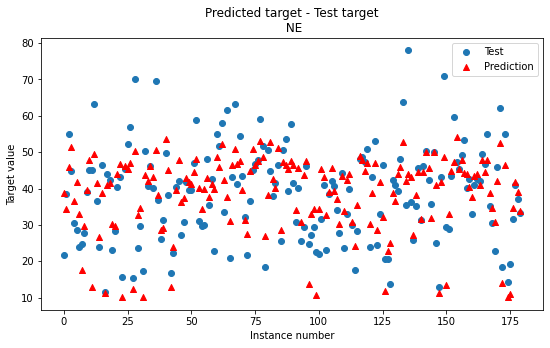

In [75]:
# Plotting the predicted targets and the test targets

plt.figure(figsize=(9, 5))
plt.scatter(range(0, len( Y_test)), Y_test)
plt.scatter(range(0, len( hypotessis_vec) ), hypotessis_vec, marker = "^", color = "red")
plt.legend(["Test", "Prediction"])
plt.xlabel("Instance number")
plt.ylabel("Target value")
plt.title("Predicted target - Test target\n NE")

# Neural Network for regression

In [76]:
#import librairies and getting the input and output sets

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

y = df2['Target']

X_DataFrame = df2[['Transaction_Date', 'House_Age', 'Distance', 'Num_Stores_NearBy', 'Latitude', 'Longitude']]

X = X_DataFrame.to_numpy()

## Split the Dataset into Train and Test sets

In [77]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print ("Train set X shape = ", X_train.shape, "\nTrain set y shape = ", y_train.shape)

print ("Test set X shape  = ", X_test.shape, "\nTest set y shape  = ", y_test.shape)

Train set X shape =  (326, 6) 
Train set y shape =  (326,)
Test set X shape  =  (82, 6) 
Test set y shape  =  (82,)


## Tuning parameters for the model

In [78]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

alpha = 0.00001
networks = []

for i in range(1, 4):
    networks.append([i])
    
for i in range(1, 10):
    for j in range(1, 10):
        networks.append([i, j])

for network in networks:
    for sol in ['adam', 'sgd', 'lbfgs']:
        for act in ['relu', 'tanh']:
            clr = MLPRegressor(solver = sol, activation = act,  alpha = alpha, hidden_layer_sizes = network, random_state = 1, max_iter = 2500)
            clr.fit(X_train, y_train)
            y_pred = clr.predict(X_test)
            if (mean_squared_error(y_test,y_pred) < 0.0032):
                print('The MSE score = {:.6f} for {} network, {} alpha, {} sol and {} act.'.format(mean_squared_error(y_test,y_pred), network, alpha, sol, act))    
                
# alpha = 0.00001
# The MSE score = 0.003019 for [7, 4] network, 1e-05 alpha, lbfgs sol and tanh act.
# The MSE score = 0.003111 for [7, 7] network, 1e-05 alpha, lbfgs sol and tanh act.

The MSE score = 0.003135 for [7, 7] network, 1e-05 alpha, lbfgs sol and tanh act.
The MSE score = 0.003142 for [9, 7] network, 1e-05 alpha, lbfgs sol and tanh act.


- In first executions, we noticed that the logistic activation function does not produce any interesting results at all no matter the chosen alpha values (0.6, 0.01, 0.001 etc.), we must then remove it for the remaining tests.
- In a couple more executions, we noticed that all three solvers can produce relatively similar results, so we must try testing all three solver with more larger sets of values for the rest of the parameters.

- We managed to reach a mean squarred error score of 0.003187 with this set of loops, changing in each exection the alpha value manually.

- Further tests will help to widen the set of possible alphas by implementing another loop which tests over 100 possible alpha values, to find better and more accurate results. 
- We will try those alpha values on all solvers, with the relu and tanh activation functions, and with different neural network structures

After several tests, we managed to find a relatively low mean square error value (0.002414), for a [9, 9] neural network structure, with the "lbfgs" solver and the "tanh" activation function. 

We will try to reduce this MSE value by changing the alpha set of values.

In [79]:
# After trying different combinations of values for the "for" loops
# The following one gave us the lowest MSE score we could reach

# for i in np.linspace(0.0021, 0.0025, 300):
#     clr = MLPRegressor(solver = 'lbfgs', activation = 'tanh',  alpha = i, hidden_layer_sizes = [9, 9], random_state = 1, max_iter = 2500)
#     clr.fit(X_train, y_train)
#     y_pred = clr.predict(X_test)
#     if (mean_squared_error(y_test,y_pred) < 0.0025):
#         print('The MSE score = {} for {} network, {} alpha, {} sol, {} act.'.format(mean_squared_error(y_test,y_pred), network, i, sol, act))
        
# Best result :
# The MSE score = 0.002414079377004218 for [9, 9] network, 0.002326086956521739 alpha, lbfgs sol, tanh act.

We managed to find a combination of parameters for this model that gives an acceptable mean square error value of of 0.002414079377004218
- Alpha  = 0.002326086956521739
- Network    = [9, 9]
- Solver     = lbfgs
- Activation = tanh

## Results

In [80]:
print('Mean Squarred Error scores :')
clr = MLPRegressor(solver='lbfgs', activation = 'tanh', alpha = 0.002326086956521739, hidden_layer_sizes=[9, 9], max_iter= 2500, random_state = 1)
clr.fit(X_train, y_train)
y_pred = clr.predict(X_test)
y_train_pred = clr.predict(X_train)           
print('Train set MSE score: '+'{}'.format(mean_squared_error(y_train,y_train_pred)))                
print('Test set MSE score : '+'{}'.format(mean_squared_error(y_test,y_pred)))

Mean Squarred Error scores :
Train set MSE score: 0.0041811125281805365
Test set MSE score : 0.0027414996817769852


In [81]:
from sklearn.metrics import r2_score

print('R Squared score :')         
print('Train set R2 score: '+'{}'.format(r2_score(y_train,y_train_pred)))                
print('Test set R2 score : '+'{}'.format(r2_score(y_test,y_pred)))

R Squared score :
Train set R2 score: 0.7207791121725162
Test set R2 score : 0.8136630459943734


Text(0.5, 1.0, 'Predicted target - Test target\n (MSE = 0.002414)')

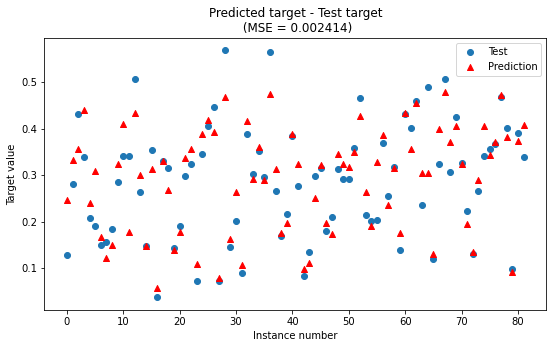

In [82]:
# Plotting the predicted targets and the test targets

plt.figure(figsize=(9, 5))
plt.scatter(range(0, 82), y_test)
plt.scatter(range(0, 82), y_pred, marker = "^", color = "red")
plt.legend(["Test", "Prediction"])
plt.xlabel("Instance number")
plt.ylabel("Target value")
plt.title("Predicted target - Test target\n (MSE = 0.002414)")

# Comparing Methods

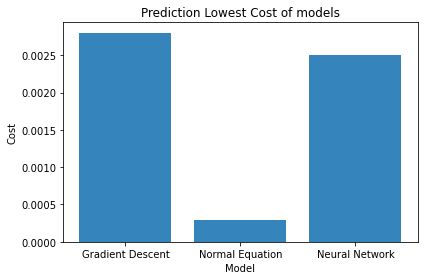

In [83]:
# bar plot of all models
models = ('Gradient Descent', 'Normal Equation', 'Neural Network')
y_pos = np.arange(len(models))
costs = [ 0.0028, 0.00029,0.0025 ]

plt.bar(y_pos, costs, align='center', alpha=0.9) # alpha: Darkness of the bar
plt.xticks(y_pos, models)
plt.xlabel('Model')
plt.ylabel('Cost')
plt.title('Prediction Lowest Cost of models')
plt.tight_layout()
plt.show()